In [29]:
!pip install mudatasets

In [30]:
!pip install pooch

     |████████████████████████████████| 64 kB 106 kB/s eta 0:00:01


In [40]:
import anndata
import matplotlib.pyplot as plt
import numpy as np
import pooch
import scanpy as sc

In [33]:
sc.settings.set_figure_params(dpi=50, facecolor="white")

In [38]:
datapath = pooch.retrieve(
    url="https://figshare.com/ndownloader/files/40067737",
    known_hash="md5:b80deb0997f96b45d06f19c694e46243",
    path="./data",
    fname="scverse-getting-started-anndata-pbmc3k_processed.h5ad",
)

In [41]:
adata = anndata.read_h5ad(datapath)

In [43]:
adata.X

<2638x11505 sparse matrix of type '<class 'numpy.float32'>'
	with 2076576 stored elements in Compressed Sparse Row format>

In [44]:
# look at the non-zero values in the data
print(adata.X.data)
# look at their indices / positions in the data matrix
print(adata.X.indices)
# compute the fraction of non-zero entries
print(adata.X.nnz / np.product(adata.X.shape))

[0.6496621 0.6496621 1.0402015 ... 0.7506172 0.7506172 1.4713064]
[   19    52    58 ... 11498 11501 11504]
0.068420527186156


In [45]:
adata.layers["raw"].data

array([1, 1, 2, ..., 1, 1, 3])

In [46]:
# copy raw counts to new layer
adata.layers["counts_per_million"] = adata.layers["raw"].copy()
# normalize the new layer to counts-per-million
sc.pp.normalize_total(adata, target_sum=10**6, layer="counts_per_million")
print(adata.layers)

Layers with keys: raw, counts_per_million


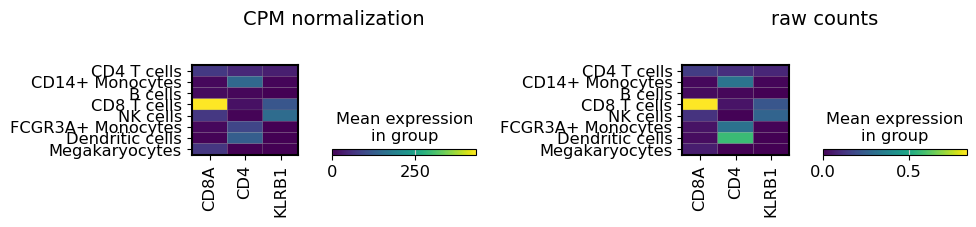

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 2.5))
genes_of_interest = ["CD8A", "CD4", "KLRB1"]
sc.pl.matrixplot(
    adata,
    groupby="louvain_cell_types",
    var_names=genes_of_interest,
    layer="counts_per_million",  ## set which layer to plot
    ax=ax1,
    show=False,
)
ax1.set_title("CPM normalization")

sc.pl.matrixplot(
    adata,
    groupby="louvain_cell_types",
    var_names=genes_of_interest,
    layer="raw",  ## set which layer to plot
    ax=ax2,
    show=False,
)
ax2.set_title("raw counts")
plt.tight_layout();

In [49]:
adata.obs

,n_genes,percent_mito,n_counts,louvain_cell_types
cell_barcode,,,,
AAACATACAACCAC-1,781,0.030178,2419.0,CD4 T cells
AAACATTGAGCTAC-1,1352,0.037936,4903.0,B cells
AAACATTGATCAGC-1,1131,0.008897,3147.0,CD4 T cells
AAACCGTGCTTCCG-1,960,0.017431,2639.0,CD14+ Monocytes
AAACCGTGTATGCG-1,522,0.012245,980.0,NK cells
...,...,...,...,...
TTTCGAACTCTCAT-1,1155,0.021104,3459.0,CD14+ Monocytes
TTTCTACTGAGGCA-1,1227,0.009294,3443.0,B cells
TTTCTACTTCCTCG-1,622,0.021971,1684.0,B cells


In [50]:
print(sum(adata.obs["louvain_cell_types"] == "B cells"))

342


In [2]:

from warnings import filterwarnings

# for datasets
import mudatasets
import muon as mu
import pandas as pd
import scanpy as sc

filterwarnings("ignore", category=FutureWarning)
filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

In [4]:
sc.set_figure_params(fontsize=18, figsize=[6, 6])

In [5]:
## Working with backed AnnData objects
# Let’s load an anndata object in memory

adata = sc.datasets.pbmc3k_processed()
adata = adata.raw.to_adata()  # Store raw counts in adata.X

In [6]:
# Convenience method for computing the size of objects
def print_size_in_MB(x):
    print(f"{x.__sizeof__() / 1e6:.3} MB")

In [7]:
print_size_in_MB(adata)

21.2 MB


In [8]:
# Now let’s save this object in .h5ad format and re-load it in backed (on-disk) mode.

adata.write_h5ad("./data/pbmc3k_processed_raw.h5ad")
adata = sc.read_h5ad("./data/pbmc3k_processed_raw.h5ad", backed=True)

print_size_in_MB(adata)

3.28 MB


In [9]:
adata.isbacked

True

In [10]:
adata.filename

PosixPath('data/pbmc3k_processed_raw.h5ad')

/home/abydanov/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


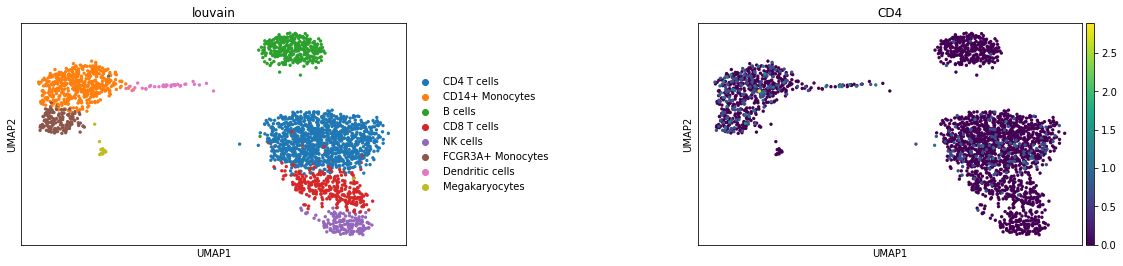

In [12]:
sc.pl.umap(adata, color=["louvain", "CD4"], wspace=0.6)

/home/abydanov/.local/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


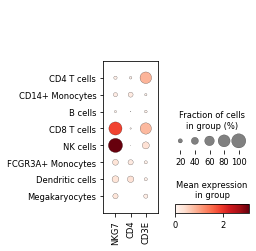

In [13]:
sc.pl.dotplot(adata, var_names=["NKG7", "CD4", "CD3E"], groupby="louvain")

In [14]:
sc.pp.neighbors(adata, n_neighbors=20)
sc.tl.umap(adata)

In [16]:
!pip install leidenalg
!pip install texttable
!pip install --upgrade --force-reinstall leidenalg igraph

  Using cached leidenalg-0.10.2-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.0 MB)
  Using cached igraph-0.11.8-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.2 MB)
  Attempting uninstall: igraph
    Found existing installation: igraph 0.11.8
    Uninstalling igraph-0.11.8:
      Successfully uninstalled igraph-0.11.8
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Attempting uninstall: leidenalg
    Found existing installation: leidenalg 0.10.2
    Uninstalling leidenalg-0.10.2:
      Successfully uninstalled leidenalg-0.10.2


In [15]:
sc.tl.leiden(adata, resolution=0.5, key_added="leiden_res0.5")

In [16]:
adata.obs

,n_genes,percent_mito,n_counts,louvain,leiden_res0.5
index,,,,,
AAACATACAACCAC-1,781,0.030178,2419.0,CD4 T cells,0
AAACATTGAGCTAC-1,1352,0.037936,4903.0,B cells,3
AAACATTGATCAGC-1,1131,0.008897,3147.0,CD4 T cells,0
AAACCGTGCTTCCG-1,960,0.017431,2639.0,CD14+ Monocytes,1
AAACCGTGTATGCG-1,522,0.012245,980.0,NK cells,2
...,...,...,...,...,...
TTTCGAACTCTCAT-1,1155,0.021104,3459.0,CD14+ Monocytes,1
TTTCTACTGAGGCA-1,1227,0.009294,3443.0,B cells,3
TTTCTACTTCCTCG-1,622,0.021971,1684.0,B cells,3


/home/abydanov/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/abydanov/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


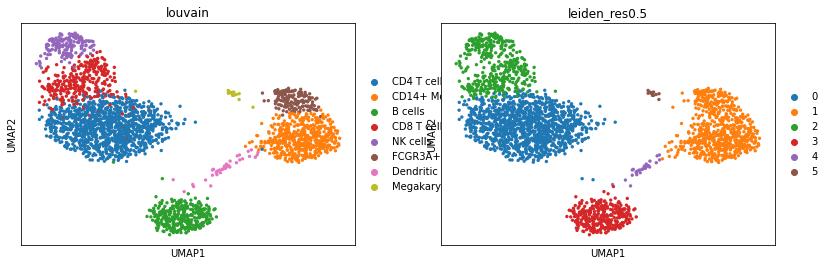

In [18]:
sc.pl.umap(adata, color=["louvain", "leiden_res0.5"])

In [19]:
# Extracting a subset of AnnData

T_clusters = ["CD4 T cells", "CD8 T cells"]
adata_subset = adata[adata.obs["louvain"].isin(T_clusters)].to_memory()

In [20]:
adata_subset

AnnData object with n_obs × n_vars = 1460 × 13714
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'leiden_res0.5'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap', 'leiden', 'leiden_res0.5_colors'
    obsm: 'X_draw_graph_fr', 'X_pca', 'X_tsne', 'X_umap'
    obsp: 'connectivities', 'distances'

In [21]:
adata_subset.isbacked

False

In [22]:
# If we want to keep working in backed mode with this data subset, we can copy it specifying a new .h5ad file on disk where this will be saved.

adata_subset = adata[adata.obs["louvain"].isin(T_clusters)].copy(filename="./data/pbmc3k_processed_CD4Tcells.h5ad")

In [ ]:
adata_subset.isbacked

In [24]:
sc.pp.normalize_total(adata)

AttributeError: 'SparseDataset' object has no attribute 'sum'

In [25]:
adata.X[:, 0 : adata.n_vars]

<2638x13714 sparse matrix of type '<class 'numpy.float32'>'
	with 2238732 stored elements in Compressed Sparse Row format>

In [26]:
adata.write_h5ad()